In [1]:
#From blog - https://www.drivendata.co/blog/dengue-benchmark/

import numpy as np
import pandas as pd

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#Read training data
#Split training data into data for each city
#Choose one of the closely correlated variables to reduce dataset (optional) -> not required now since we are identifying closely correlated features to total_cases
#Check for null values
#Fill null values (impute) -> opportunity
#Check mean & variances for total_cases in each city to understand the spread and choose a regression model - opportunity 
#Check linear correlation of variables to total_cases
#Identify most correlated variables to total_cases and choose only those -> opportunity
#Transpose (log, etc.) the variables to bring correlation closer to 1 -> opportunity
#Impute only the reduced set of features -> better than imputing all features
#Pick one of the two highly correlatated fatures which has less duplicates & fewer null values of the two
#Because null values brings in inaccuracy in your prediction
#For next iteration, Pick the variables which are highly correlated to the already chosen features
#Change how you impute your null values


In [7]:
#Load training dataset
#data = pd.read_csv(r"C:\Users\FunTime\Desktop\DengAI_Competetion\dengue_features_train.csv")
#print(data)

In [8]:
#print(data.shape)

In [9]:
#Load labels
#labels = pd.read_csv(r"C:\Users\FunTime\Desktop\DengAI_Competetion\dengue_labels_train.csv")
#print(labels)

In [10]:
#print(labels.shape)

In [11]:
# load the provided data
train_features = pd.read_csv(r"C:\Users\FunTime\Desktop\DengAI_Competetion\dengue_features_train.csv",
                             index_col=[0,1,2])

train_labels = pd.read_csv(r"C:\Users\FunTime\Desktop\DengAI_Competetion\dengue_labels_train.csv",
                           index_col=[0,1,2])

In [12]:
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']

In [13]:
print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

San Juan
features:  (936, 21)
labels  :  (936, 1)

Iquitos
features:  (520, 21)
labels  :  (520, 1)


In [14]:
sj_train_features.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                           
1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
     19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
     20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
     21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
     22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
1990 18                         12.42             297.572857   
     19                         22.82             298.211429   
     20                         34.54             298.781429   
     21                         15.36             298.987143   
     22                          7.52             299.518571   

                 reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
year weekofyear                                                       
1990 18                     297.742857                   292.414286   
     19                     298.442857                   293.951429   
     20                     298.878571                   295.434286   
     21                     299.228571                   295.310000   
     22                     299.664286                   295.821429   

                 reanalysis_max_air_temp_k  ...  \
year weekofyear                             ...   
1990 18                              299.8  ...   
     19                              300.9  ...   
     20                              300.5  ...   
     21                              301.4  ...   
     22                              301.9  ...   

                 reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                    
1990 18                                    32.00   
     19                                    17.94   
     20                                    26.10   
     21                                    13.90   
     22                                    12.20   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
1990 18                                     73.365714   
     19                                     77.368571   
     20                                     82.052857   
     21                                     80.337143   
     22                                     80.460000   

                 reanalysis_sat_precip_amt_mm  \
year weekofyear                                 
1990 18                                 12.42   
     19                                 22.82   
     20                                 34.54   
     21                                 15.36   
     22                                  7.52   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
1990 18                                      14.012857           2.628571   
     19                                      15.372857           2.371429   
     20                                      16.848571           2.300000   
     21                                      16.672857           2.428571   
     22                                      17.210000           3.014286   

                 station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear                                                
1990 18                   25.442857                 6.900000   
     19                   26.714286                 6.371429   
     20                   26.714286                 6.485714   
     21                   27.471429                 6.771429   
     22                   28.942857                 9.371429   

                 station_max_temp_c  station_min_temp_c  station_precip_mm  
year weeko

In [16]:
# Null check
pd.isnull(sj_train_features).any()

ndvi_ne                                  True
ndvi_nw                                  True
ndvi_se                                  True
ndvi_sw                                  True
precipitation_amt_mm                     True
reanalysis_air_temp_k                    True
reanalysis_avg_temp_k                    True
reanalysis_dew_point_temp_k              True
reanalysis_max_air_temp_k                True
reanalysis_min_air_temp_k                True
reanalysis_precip_amt_kg_per_m2          True
reanalysis_relative_humidity_percent     True
reanalysis_sat_precip_amt_mm             True
reanalysis_specific_humidity_g_per_kg    True
reanalysis_tdtr_k                        True
station_avg_temp_c                       True
station_diur_temp_rng_c                  True
station_max_temp_c                       True
station_min_temp_c                       True
station_precip_mm                        True
dtype: bool

Text(0.5, 0, 'Time')

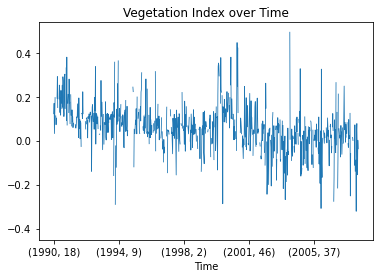

In [17]:
(sj_train_features
     .ndvi_ne
     .plot
     .line(lw=0.8))

plt.title('Vegetation Index over Time')
plt.xlabel('Time')

In [30]:
#Since we can't build a model without those values, we'll take a simple approach and just fill those values with the most recent value that we saw up to that point. 
#This is probably a good part of the problem to improve your score by getting smarter.
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

In [31]:
print('San Juan')
print('mean: ', sj_train_labels.mean()[0])
print('var :', sj_train_labels.var()[0])

print('\nIquitos')
print('mean: ', iq_train_labels.mean()[0])
print('var :', iq_train_labels.var()[0])

San Juan
mean:  34.18055555555556
var : 2640.045439691045

Iquitos
mean:  7.565384615384615
var : 115.8955239365642


array([[<AxesSubplot:title={'center':'total_cases'}>]], dtype=object)

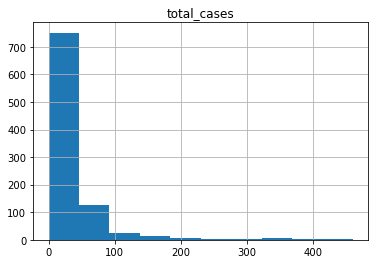

In [32]:
sj_train_labels.hist()

array([[<AxesSubplot:title={'center':'total_cases'}>]], dtype=object)

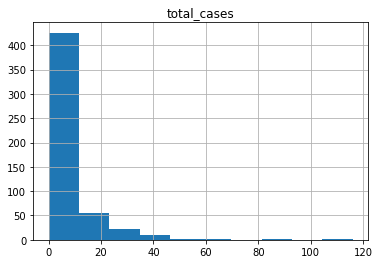

In [33]:
iq_train_labels.hist()

In [36]:
#Add the total_cases to dataframe
#sj_train_features['total_cases'] = sj_train_labels.total_cases
#iq_train_features['total_cases'] = iq_train_labels.total_cases

In [37]:
# compute the correlations
sj_correlations = sj_train_features.corr()
iq_correlations = iq_train_features.corr()

Text(0.5, 1.0, 'San Juan Variable Correlations')

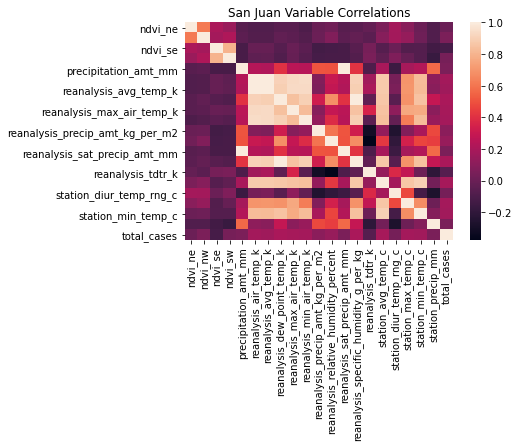

In [38]:
# plot san juan
sj_corr_heat = sns.heatmap(sj_correlations)
plt.title('San Juan Variable Correlations')

Text(0.5, 1.0, 'Iquitos Variable Correlations')

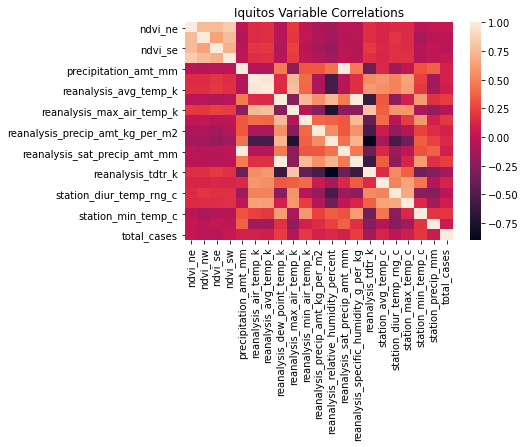

In [39]:
# plot iquitos
iq_corr_heat = sns.heatmap(iq_correlations)
plt.title('Iquitos Variable Correlations')

<AxesSubplot:>

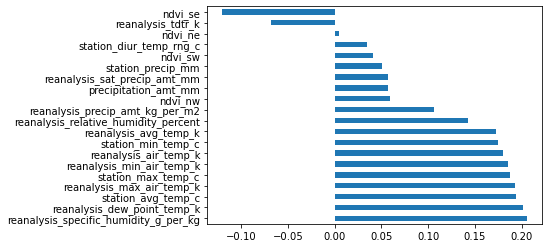

In [40]:
# Sorted look at total_cases correlation - San Juan
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

<AxesSubplot:>

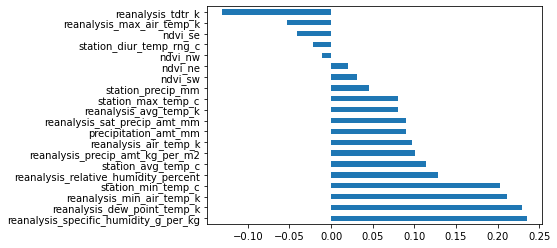

In [41]:
# Iquitos
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

<AxesSubplot:>

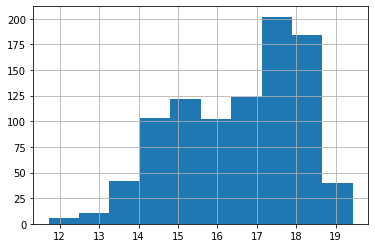

In [43]:
#Plot histogram for most correlated variable
sj_train_features['reanalysis_specific_humidity_g_per_kg'].hist()